In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import pandas as pd
import seaborn as sns

sns.set_context("talk")
%matplotlib inline

In [40]:
!scp pi@192.168.1.189:hydrofarm/data/sensor_data.csv ../data/

sensor_data.csv                               100%   36KB   1.9MB/s   00:00    


In [41]:
sensor = pd.read_csv('../data/sensor_data.csv', names=['ts', 'temperature', 'light', 'moisture'])
sensor['ts'] = pd.to_datetime(sensor.ts)
sensor.set_index('ts', inplace=True)
sensor.head()

,temperature,light,moisture
ts,,,
2018-11-23 12:26:35,25.176613,39,98
2018-11-23 12:31:35,24.823596,34,95
2018-11-23 12:36:35,25.176613,38,96
2018-11-23 12:41:35,25.530488,35,96
2018-11-23 12:46:35,26.241005,32,96


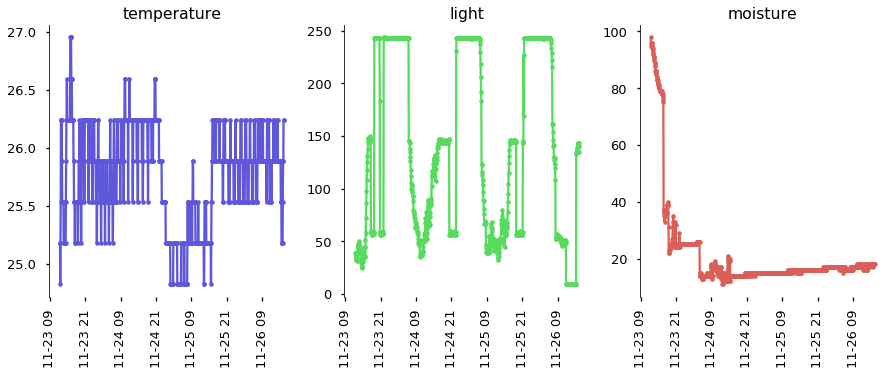

In [42]:
# finest granularity
cp = sns.color_palette('hls', 3)
plt.figure(figsize=(15,5))
for m,measure in enumerate(['temperature', 'light', 'moisture']):
    plt.subplot(1,3,m+1)
    plt.plot(sensor[measure], '.-', color=cp.pop())
    plt.title(measure)
    plt.xticks(rotation=90)
sns.despine(bottom=True)

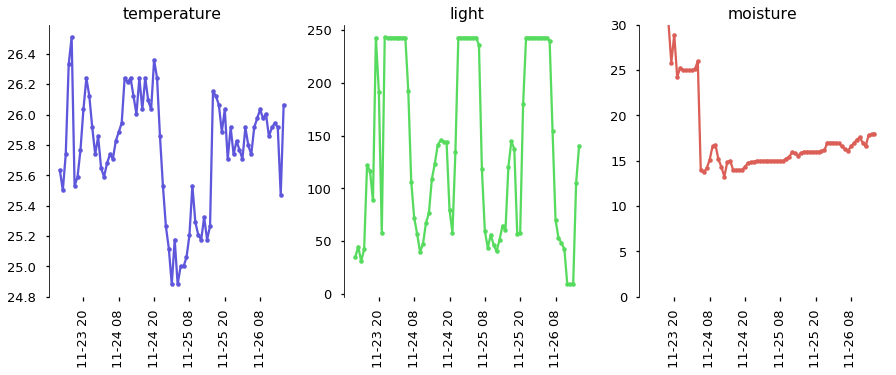

In [44]:
# agg to an hour
cp = sns.color_palette('hls', 3)
plt.figure(figsize=(15,5))
for m,measure in enumerate(['temperature', 'light', 'moisture']):
    plt.subplot(1,3,m+1)
    plt.plot(sensor[measure].resample('H').mean(), '.-', color=cp.pop())
    plt.title(measure)
    plt.xticks(rotation=90)
plt.ylim(0,30)
sns.despine(bottom=True)

Conclusions: the ambient temperature is pretty stable, varying only within a few degrees. It seems higher than it should be though....

The light follows a predictable pattern: the reading is high at night time (high valued reading) and gradually lowers during the day. It begins to darken again as the sun sets by we'll often turn a light on in the room briefly for dinner. 

Moisture, after being initially very high (dry), has settled around 15. This seems to imply that after a couple waterings the vermiculite has been saturated. 